# The Sparks Foundation - GRIP - Data Science and Business Analytics Intern- AUGUEST-2021

# TASK1 - Prediction the optimum number of clusters From given iris dataset

**by SANTOSH VODHALA**

DATASET LINK-: https://bit.ly/3kXTdox

In this task we are going to Predict optimum number of clusters formation and visualizing it using Elbow Method

# Step1 Defining objectives

In [1]:
#importing nessessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Step2 Data collection

In [2]:
#importing the dataset and displaying
df=pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Step 3 Data Preprocessing 

In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
print(df.isnull().sum(),'\n\n Number of duplicate rows:',df.duplicated().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64 

 Number of duplicate rows: 3


In [6]:
#Removing the duplicates
df.drop_duplicates()
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
df.shape

(150, 5)

# Step4 Data divided into clusters

In [8]:
x=df.iloc[:,[0,1,2]].values

from sklearn.cluster import KMeans

km=KMeans(n_clusters=3)
km.fit(x)

KMeans(n_clusters=3)

In [9]:
km.cluster_centers_
#finding nearest values

array([[6.83571429, 3.06428571, 5.6547619 ],
       [5.006     , 3.418     , 1.464     ],
       [5.84655172, 2.73275862, 4.3637931 ]])

In [10]:
#data is labeled as centroid values
pred=km.labels_
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [11]:
df['clusters']=pred
df

,sepal_length,sepal_width,petal_length,petal_width,species,clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [12]:
display(df['clusters'].value_counts(),df['species'].value_counts())

2    58
1    50
0    42
Name: clusters, dtype: int64

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

# Step 5 Prediction using Elbow method

In [13]:
#finding optimum number of clusters 
wss=[]
cluster_range=range(1,11)

for k in cluster_range:
    km=KMeans(n_clusters=k,random_state=0)
    km.fit(x)
    inertia=km.inertia_
    wss.append(inertia)

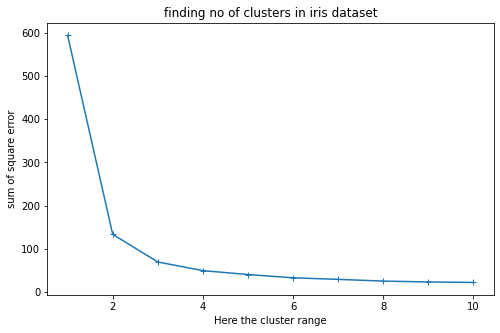

In [14]:
plt.figure(figsize=(8,5))
plt.xlabel("Here the cluster range")
plt.ylabel("sum of square error")
plt.title("finding no of clusters in iris dataset")
plt.plot(cluster_range,wss,marker="+")

plt.show()

# Step 6 Visualization of Clusters

In [15]:
#fitting the data 
kmeans= KMeans(n_clusters = 3, init = 'k-means++',
              max_iter=300, n_init=10, random_state=0 )
y_kmeans= kmeans.fit_predict(x)

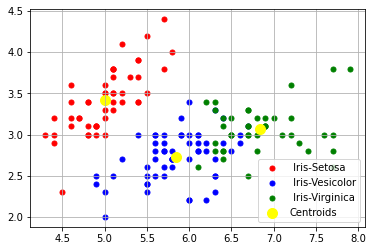

In [16]:
#visualising the clusters - on the first two  columns
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 25, c = 'red', label= " Iris-Setosa")
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 25, c = 'blue', label= " Iris-Vesicolor")
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 25, c = 'green', label= " Iris-Virginica")

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 100, c= 'yellow', label = 'Centroids')
plt.grid()
plt.legend()